In [1]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
df= pd.read_csv('iris.csv')
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

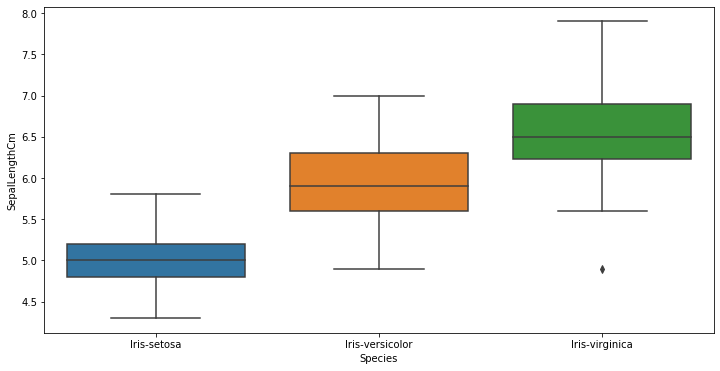

In [3]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Species", y="SepalLengthCm")
# boxplot shows the distribution of sepal length acroos the three species illustratiing differences in central tendency and spread

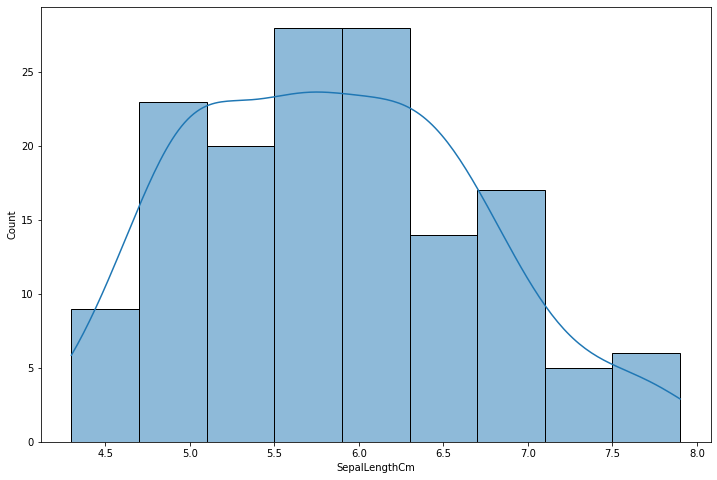

In [4]:
plt.figure(figsize=(12, 8))
sns.histplot(df['SepalLengthCm'], kde=True)
plt.savefig("histogram_irissepal.pdf", bbox_inches="tight")
plt.show()

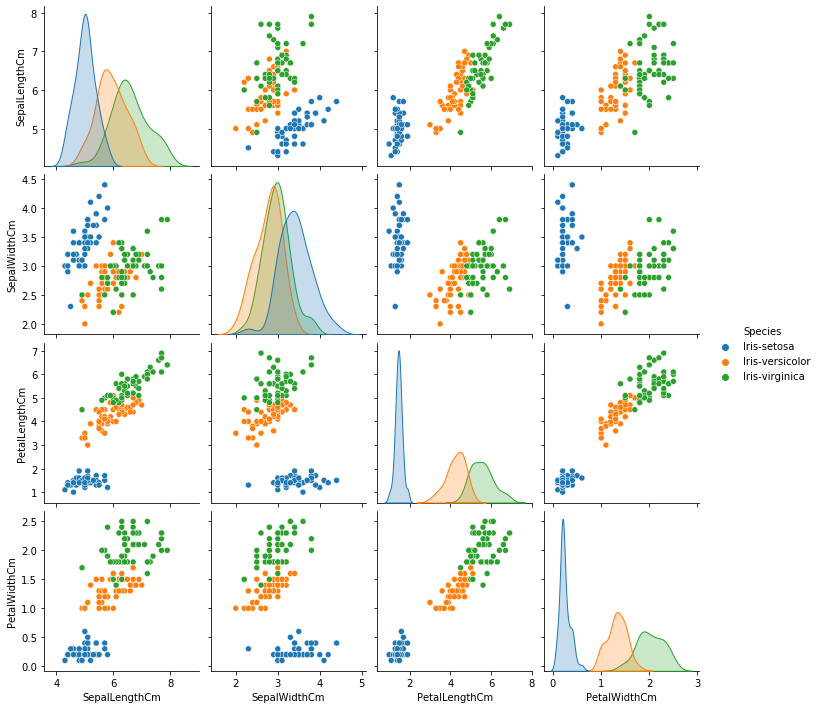

In [5]:
pp=sns.pairplot(df, hue="Species")
pp.savefig("irispairplotspecies.pdf")
# Save the plot as a PDF
plt.savefig('eda_iris_pairplot.pdf', format='pdf')

plt.show()

pair plot display scatterplots for all pairs of continuous features along with histograms for each individual feature.visualise the relationship between features and distributions of each feature

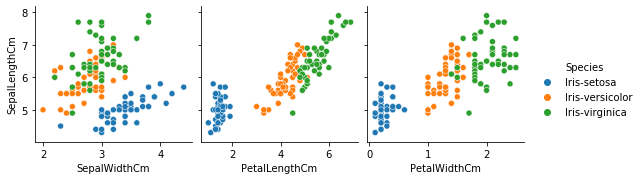

In [6]:
spg = sns.pairplot(df, y_vars=["SepalLengthCm"], x_vars=['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue= "Species")
spg.savefig("irispairplot.pdf")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

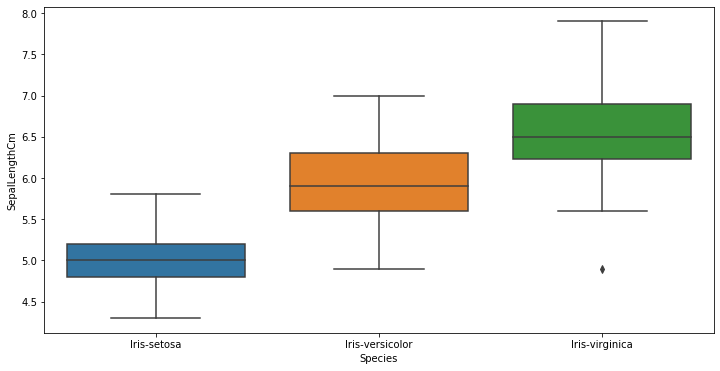

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="Species", y="SepalLengthCm")
plt.show

In [8]:

def assign_cat_codes(df, col_name):
    col_index = df.columns.get_loc(col_name)
    df[col_name] = df[col_name].astype('category')
    df.insert(col_index + 1, f'{col_name}_cat', df[col_name].cat.codes)
    df.drop(columns=[col_name], inplace=True)
    
columns_to_convert = ['Species']

for col in columns_to_convert:
    assign_cat_codes(df, col)
    

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [10]:
# Perform RFE with cross-validation
rfe_cv = RFECV(RandomForestRegressor(n_estimators=100, random_state=0), scoring='neg_mean_absolute_error', cv=10)
rfe_cv.fit(X, y)

# Get the optimal number of features
optimal_n = rfe_cv.n_features_
print('Optimal number of features:', optimal_n)

# Get the mask of selected features
selected_features_mask = rfe_cv.support_

# Print the selected feature names
selected_feature_names = np.array(X.columns)[selected_features_mask]
print("Selected features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = X.iloc[:, selected_features_mask]

X= X_selected
X

Optimal number of features: 4
Selected features: ['SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm' 'Species_cat']


,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cat
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Random Forest
start_time_rf = time.time()
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_rf = time.time() - start_time_rf
print("Runtime for Random Forest:", runtime_rf)
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_rf) * -1)
print()


# Decision Tree
start_time_dt = time.time()
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_dt = time.time() - start_time_dt
print("Runtime for Decision Tree:", runtime_dt)
#print("Results for Decision Tree:")
#print("Mean Absolute Error (Train):", np.mean(scores_dt) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_dt) * -1)
print()

# K-Nearest Neighbors
start_time_knn = time.time()
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_knn = time.time() - start_time_knn
print("Runtime for K-Nearest Neighbors:", runtime_knn)
#print("Mean Absolute Error (Train):", np.mean(scores_knn) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_knn) * -1)
print()


# XGBoost
start_time_xgb = time.time()
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
runtime_xgb = time.time() - start_time_xgb
print("Runtime for XGBoost:", runtime_xgb)
#print("Mean Absolute Error (Train):", np.mean(scores_xgb) * -1)
print("Mean Absolute Error (Test):", np.mean(scores_test_xgb) * -1)
print()


Runtime for Random Forest: 1.7227270603179932
Mean Absolute Error (Test): 0.35589999999999933

Runtime for Decision Tree: 0.040268659591674805
Mean Absolute Error (Test): 0.41333333333333355

Runtime for K-Nearest Neighbors: 0.024257183074951172
Mean Absolute Error (Test): 0.3480000000000002

Runtime for XGBoost: 259.34471249580383
Mean Absolute Error (Test): 0.4157982222239177



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)

0.35589999999999933
0.41333333333333355
0.3480000000000002
0.4157982222239177


In [13]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Define data generator functions for each algorithm

def random_forest_data_generator(n):
    X = np.random.rand(n, 10)  # Example: Generate random input features
    y = np.random.rand(n)  # Example: Generate random target values
    return X, y

def decision_tree_data_generator(n):
    X = np.random.rand(n, 10)  # Example: Generate random input features
    y = np.random.rand(n)  # Example: Generate random target values
    return X, y

def knn_data_generator(n):
    X = np.random.rand(n, 10)  # Example: Generate random input features
    y = np.random.rand(n)  # Example: Generate random target values
    return X, y

def xgboost_data_generator(n):
    X = np.random.rand(n, 10)  # Example: Generate random input features
    y = np.random.rand(n)  # Example: Generate random target values
    return X, y

# Define the complexity functions for each algorithm

def random_forest_complexity(X, y):
    start_time = time.time()
    
    ranf = RandomForestRegressor(random_state=0)
    rf = ranf.fit(X, y)
    # Perform other necessary steps
    
    elapsed_time = time.time() - start_time
    return elapsed_time

def decision_tree_complexity(X, y):
    start_time = time.time()
    
    dectree = DecisionTreeRegressor(random_state=0)
    dt = dectree.fit(X, y)
    # Perform other necessary steps
    
    elapsed_time = time.time() - start_time
    return elapsed_time

def knn_complexity(X, y):
    start_time = time.time()
    
    knn_model = KNeighborsRegressor(n_neighbors=5).fit(X, y)
    # Perform other necessary steps
    
    elapsed_time = time.time() - start_time
    return elapsed_time

def xgboost_complexity(X, y):
    start_time = time.time()
    
    xgb_reg = xgb.XGBRegressor(random_state=0)
    # Perform other necessary steps
    
    elapsed_time = time.time() - start_time
    return elapsed_time

# Perform runtime and complexity analysis for each algorithm

X_rf, y_rf = random_forest_data_generator(100)
complexity_rf = random_forest_complexity(X_rf, y_rf)
print("Complexity for Random Forest:", complexity_rf)

X_dt, y_dt = decision_tree_data_generator(100)
complexity_dt = decision_tree_complexity(X_dt, y_dt)
print("Complexity for Decision Tree:", complexity_dt)

X_knn, y_knn = knn_data_generator(100)
complexity_knn = knn_complexity(X_knn, y_knn)
print("Complexity for K-Nearest Neighbors:", complexity_knn)

X_xgb, y_xgb = xgboost_data_generator(100)
complexity_xgb = xgboost_complexity(X_xgb, y_xgb)
print("Complexity for XGBoost:", complexity_xgb)


Complexity for Random Forest: 0.0828695297241211
Complexity for Decision Tree: 0.0006175041198730469
Complexity for K-Nearest Neighbors: 0.00018978118896484375
Complexity for XGBoost: 1.3589859008789062e-05


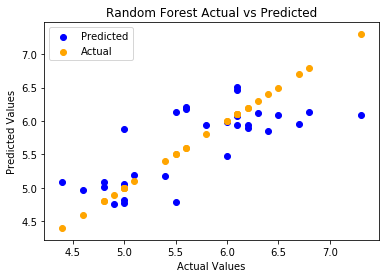

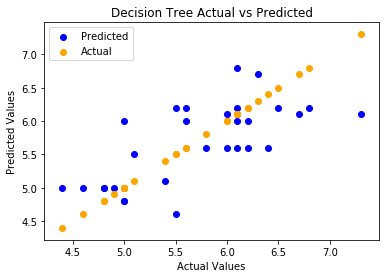

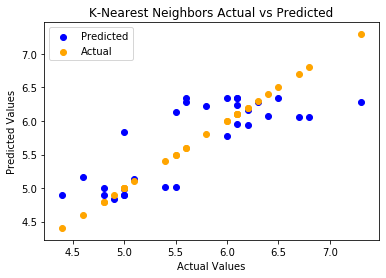

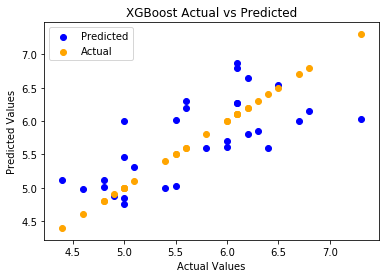

In [14]:
import matplotlib.pyplot as plt

# Create scatterplot for Random Forest
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Actual vs Predicted')
plt.legend()
plt.show()

# Create scatterplot for Decision Tree
plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Actual vs Predicted')
plt.legend()
plt.show()

# Create scatterplot for K-Nearest Neighbors
plt.scatter(y_test, y_pred_knn, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Actual vs Predicted')
plt.legend()
plt.show()

# Create scatterplot for XGBoost
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Actual vs Predicted')
plt.legend()
plt.show()


In [15]:
X1=X
def normalize_columns(X1, columns_to_normalize):
    result = X1.copy()
    for feature_name in columns_to_normalize:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = (X1[feature_name] - min_value) / (max_value - min_value)
    return result

# Assuming you have a DataFrame called 'X1'
# Select the columns you want to normalize
columns_to_normalize = ['SepalWidthCm' ,'PetalLengthCm' ,'PetalWidthCm']

# Normalize the specified columns in the DataFrame
X = normalize_columns(X1, columns_to_normalize)

print(X)


     SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_cat
0        0.625000       0.067797      0.041667            0
1        0.416667       0.067797      0.041667            0
2        0.500000       0.050847      0.041667            0
3        0.458333       0.084746      0.041667            0
4        0.666667       0.067797      0.041667            0
..            ...            ...           ...          ...
145      0.416667       0.711864      0.916667            2
146      0.208333       0.677966      0.750000            2
147      0.416667       0.711864      0.791667            2
148      0.583333       0.745763      0.916667            2
149      0.416667       0.694915      0.708333            2

[150 rows x 4 columns]


Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445

<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s


Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1

<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: S

<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-


Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1,

<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat,

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, 

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, 

<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Sp

<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: S

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: S

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: S

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, M

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: S

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, 

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Sp

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1,

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, 

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Spe

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: S

<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Me

<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Sp

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581

/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v


Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667
Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765
Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434
Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._s

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186
Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565
Column: Species_cat, Value: 0, Mean: 4.995744680851064
Column: Species_cat, Value: 1, Mean: 5.859523809523809
Column: Species_cat, Value: 2, Mean: 6.606521739130434


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 5.030952380952381
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.616666666666667


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.984444444444445
Column: Species_cat, Value: 1, Mean: 5.966666666666667
Column: Species_cat, Value: 2, Mean: 6.5955555555555545
Column: Species_cat, Value: 0, Mean: 5.006
Column: Species_cat, Value: 1, Mean: 5.942222222222222
Column: Species_cat, Value: 2, Mean: 6.6375
Column: Species_cat, Value: 0, Mean: 4.995555555555555
Column: Species_cat, Value: 1, Mean: 5.939534883720929
Column: Species_cat, Value: 2, Mean: 6.5957446808510625
Column: Species_cat, Value: 0, Mean: 5.0311111111111115
Column: Species_cat, Value: 1, Mean: 5.953191489361703
Column: Species_cat, Value: 2, Mean: 6.57906976744186


<ipython-input-16-0177765e9075>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-16-0177765e9075>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Column: Species_cat, Value: 0, Mean: 5.037209302325581
Column: Species_cat, Value: 1, Mean: 5.944897959183674
Column: Species_cat, Value: 2, Mean: 6.565116279069768
Column: Species_cat, Value: 0, Mean: 4.986046511627907
Column: Species_cat, Value: 1, Mean: 5.9222222222222225
Column: Species_cat, Value: 2, Mean: 6.548936170212765


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

Column: Species_cat, Value: 0, Mean: 4.993333333333334
Column: Species_cat, Value: 1, Mean: 5.924444444444445
Column: Species_cat, Value: 2, Mean: 6.553333333333333
Column: Species_cat, Value: 0, Mean: 5.002222222222223
Column: Species_cat, Value: 1, Mean: 5.934090909090909
Column: Species_cat, Value: 2, Mean: 6.58478260869565


/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = means[(col, val)]
<ipython-input-16-0177765e9075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = means[(col, val)]
<ipython-input-

Runtime: 341.3859257698059


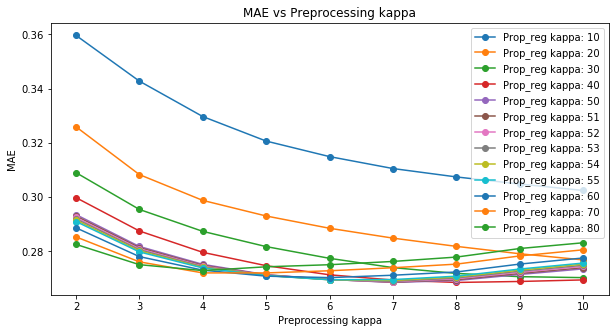

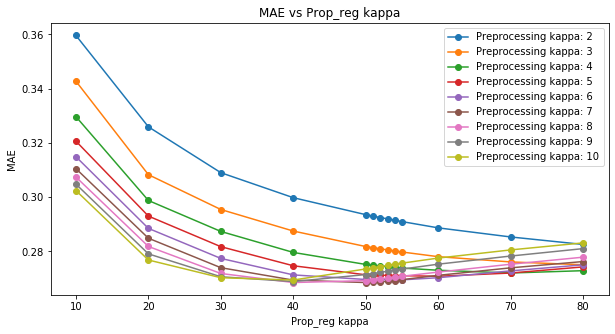

Optimal Preprocessing kappa: 7
Optimal Prop_reg kappa: 50
Minimum MAE: 0.268550520485729


In [16]:
start_time = time.time()
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)


def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa



import matplotlib.pyplot as plt


ordinal_columns = ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
kappa_values_preprocessing = [2,3,4,5,6,7,8,9,10]
kappa_values_prop_reg = [10,20,30,40,50,51,52,53,54,55,60,70,80]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)

runtime_pr = time.time() - start_time
print("Runtime:", runtime_pr)

# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()

# Plot the MAE vs kappa curve for prop_reg
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"Preprocessing kappa: {kappa_preprocessing}")

plt.xlabel('Prop_reg kappa')
plt.ylabel('MAE')
plt.title('MAE vs Prop_reg kappa')
plt.legend()
plt.show()


    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")

In [21]:
runtime_pr = time.time() - start_time
print("Runtime:", runtime_pr)


Runtime: 903.7551877498627


In [17]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))

# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))
    

Kappa combinations and their MAE values:
(2, 10, 0.3596490019275672)
(2, 20, 0.32595421809427316)
(2, 30, 0.30904478720595946)
(2, 40, 0.29982882410226247)
(2, 50, 0.2935725254117313)
(2, 51, 0.2930296535492033)
(2, 52, 0.2925196869694253)
(2, 53, 0.2920146371619967)
(2, 54, 0.2915142971524958)
(2, 55, 0.29101847486497834)
(2, 60, 0.28870535195133396)
(2, 70, 0.2853514281495934)
(2, 80, 0.2825921761324726)
(3, 10, 0.3427795192322076)
(3, 20, 0.30831803187375456)
(3, 30, 0.2954700025857068)
(3, 40, 0.2875291421800496)
(3, 50, 0.2818178846417504)
(3, 51, 0.2813960919343922)
(3, 52, 0.2809807125093654)
(3, 53, 0.2805874611808622)
(3, 54, 0.28019624385263836)
(3, 55, 0.2798071222214654)
(3, 60, 0.2780826657567407)
(3, 70, 0.2761458554485101)
(3, 80, 0.2751094737882158)
(4, 10, 0.32971876354139384)
(4, 20, 0.2988018983653148)
(4, 30, 0.2873870083258686)
(4, 40, 0.2796478865266069)
(4, 50, 0.27521981204693236)
(4, 51, 0.27485919246108204)
(4, 52, 0.27457320127726514)
(4, 53, 0.27433844926985

Column: Species_cat, Value: 2, Mean: 6.638636363636365
Column: Species_cat, Value: 1, Mean: 5.886486486486486
Column: Species_cat, Value: 0, Mean: 5.02051282051282


/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-16-0177765e9075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == v

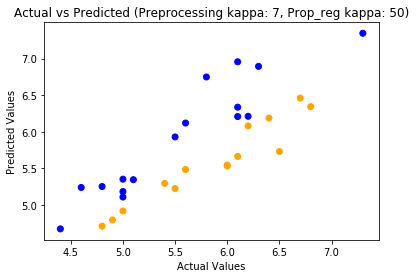

In [18]:
optimal_kappa_preprocessing = 7
optimal_kappa_prop_reg = 50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, optimal_kappa_preprocessing, ordinal_columns)
y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, optimal_kappa_prop_reg)

plt.scatter(y_test, y_pred, c=['blue' if y_pred[i] >= y_test.iloc[i] else 'orange' for i in range(len(y_test))])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (Preprocessing kappa: {optimal_kappa_preprocessing}, Prop_reg kappa: {optimal_kappa_prop_reg})')
plt.show()


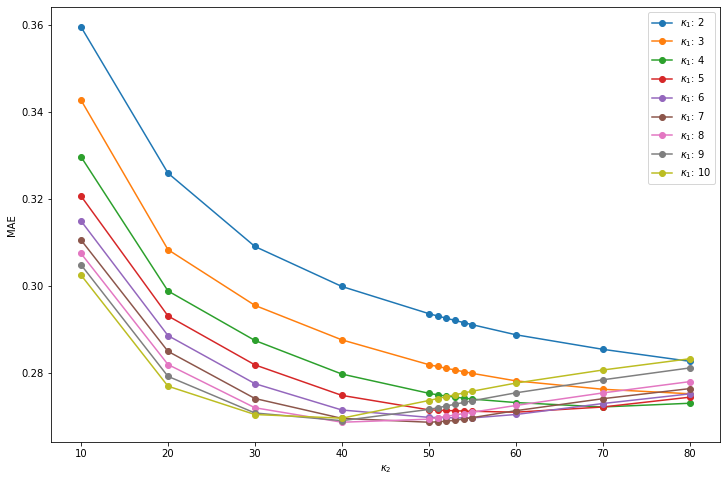

In [19]:
plt.figure(figsize=(12, 8))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o', label=f"$\\kappa_1$: {kappa_preprocessing}")

plt.xlabel('$\\kappa_2$')
plt.ylabel('MAE')
plt.legend()

# Save the plot as a PDF
plt.savefig('iris_mae_vs_predicting_kappa.pdf', format='pdf')

# Show the plot
plt.show()

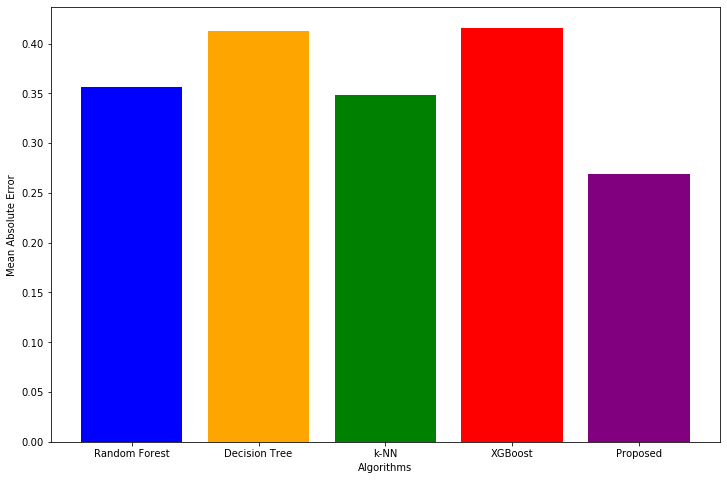

In [20]:
# Results data
results = {
    'Random Forest': 0.356,
    'Decision Tree': 0.413,
    'k-NN': 0.348,
    'XGBoost': 0.416,
    'Proposed': 0.269,
}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Absolute Error')

# Save the plot as a PDF
plt.savefig('irisresults_bar_graph.pdf', format='pdf')

# Show the plot
plt.show()
